# Recitation 11: Spherical Harmonics

Author: Tri Nguyen

This recitation introduces spherical harmonics.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

%matplotlib inline

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Background

## Laplace's equation in spherical coordinate

Let our coordinate system be $(r, \theta, \phi)$ where $r$ is the radius, $\theta$ is the polar angle ($0 \leq \theta \leq \pi)$ , and $\phi$ is the azimuthal angle $(0 \leq \phi \leq 2\pi)$.
We want to solve the Laplace's equation for a scalar function $\Psi = \Psi(r, \theta, \phi)$:

\begin{equation}
    \nabla^2 \Psi = 
    \frac{1}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial \Psi}{\partial r} \right)
    + \frac{1}{r^2 \sin\theta} \frac{\partial}{\partial \theta} \left(\sin\theta \frac{\partial \Psi}{\partial \theta} \right) 
    + \frac{1}{r^2 \sin^2\theta} \frac{\partial^2 \Psi}{\partial \phi^2} 
\end{equation}

As a reminder, the Laplacian $\nabla^2$ (or also $\Delta$) is the divergence of the gradient.
We often encounter the Laplace's equation in many areas of physics. 
For example:

1. $\nabla^2 V = 0$ for $\mathbf{E} = -\nabla V$ where $\mathbf{E}$ is the electric field and $V$ is the electric potential

2. $\nabla^2 \phi = 0$ for $\mathbf{g} = -\nabla \phi$ where $\mathbf{g}$ is the gravitational field and $\phi$ is the gravitational potential

and so on.

<img src="figures/spherical_coord.png" width=700 height=700 />

In physics, we often find that we can separate the solution $\Psi$ into a radial component $R(r)$ and an angular component $Y(\theta, \phi)$, i.e. $\Psi(r, \theta, \phi) = R(r) Y(\theta, \phi)$.
Then, the Laplace's equation becomes:

\begin{equation}
    \frac{1}{R}\frac{d}{dr}\left(r^2 \frac{dR}{dr}\right) = l(l+1) , \quad 
    \frac{1}{Y}\frac{1}{\sin\theta} \frac{\partial}{\partial\theta}
    \left(\sin\theta\frac{\partial Y}{\partial \theta}\right) 
    + \frac{1}{Y} \frac{1}{\sin^2\theta} \frac{\partial^2 Y}{\partial \phi^2} 
    = -l(l + 1)
\end{equation}

where we let the separation constant to be $l(l+1)$ by convention.

## Spherical harmonics

In this recitation, we will ignore the radial equation and focus on the angular equation.
To solve for the angular equation, we again apply separation of variables by assuming that $Y$ has the form $Y(\theta, \phi) = \Theta(\theta) \Phi(\phi)$:

\begin{equation}
    \label{eq:laplace_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2
\end{equation}

\begin{equation}
    \label{eq:laplace_polar}
    l(l+1)\sin^2\theta 
    + \frac{\sin\theta}{\Theta}\frac{d}{d\theta}\left(\sin\theta \frac{d\Theta}{d\theta}\right)
    = m^2
\end{equation}

where we let our second separation constant to be $m^2$ by convention.

### The azimuthal equation

The azimuthal equation has a simple solution:

\begin{equation}
    \label{eq:sol_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2 \Rightarrow \Phi(\phi) = e^{im\phi}
\end{equation}

Here, we have simplied the solution by allowing $m$ to have negative values. 

> **QUESTION 1:** 
Proof that $m$ must also be an integer.

> **ANSWER 1:**
The azimuthal solution $\Phi$ repeats itself every $2\pi$, i.e.:
\begin{align*}
    &\Phi(\phi + 2\pi) = \Phi(\phi) \\
    \Rightarrow \, & \exp(i m(\phi + 2\pi)) = \exp(2\pi i m) \\
    \Rightarrow \, & \exp(2\pi i m) = 1
\end{align*}
So $m$ must be an integer.


### The polar equation
The polar equation is a bit more complicated, so we will just show the solution here:

\begin{equation}
    \label{eq:sol_polar}
    \Theta(\theta) = P^m_l(\cos\theta)
\end{equation}

where $P^m_l$ is the *associcated Legendre function*:

\begin{equation}
    P^m_l(x) = \frac{(-1)^m}{2^l l!}(1-x^2)^{m/2} \frac{d^{l+m}}{dx^{l+m}} (x^2 - 1)^l
\end{equation}

which is non-zero for non-negative $l$ and $-l \leq m \leq l$.
The factor $(-1)^m$ is the Condon and Shortley phase factor convention, which is convenient in quantum mechanics (e.g. angular momentum ladder operator).
This is the convention used by Scipy: see [`scipy.special.lpmv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html#scipy.special.lpmv).


### Final solution
Combining the azimuthal and polar solutions,
we have the solution for the angular Laplace's equation:

\begin{equation}
    \boxed{Y^m_l(\theta, \phi) 
    = \sqrt{\frac{(2l + 1)}{4\pi} \frac{(l-m)!}{(l+m)!}} e^{i m \phi} P^m_l(\cos\theta)}
\end{equation}

for $l = 0, 1, 2,...$ and $m = -l, -l + 1, ..., l - 1, l$. 
The functions $Y^m_l (\theta, \phi)$ are known as the **spherical harmonics**. 
The first term of $Y^m_l$ is the normalization constant chosen such that:

\begin{equation}
    \int _0^{2\pi}\int_{-1}^{1} \left|Y^m_l(\theta, \phi)\right|^2 d(\cos\theta) d\phi = 1
\end{equation}

> **QUESTION 2:**
What is the relation between $P^m_l$ and $P^{-m}_l$? What is the relation between $Y^m_l$ and $Y^{-m}_l$ then?

> **ANSWER 2:**
It is straight-forward to show that:
\begin{equation*}
    P^{-m}_ l(\cos\theta) = (-1)^m \frac{(l-m)!}{(l+m)!} P^m_l(\cos\theta)
\end{equation*}
which leads to:
\begin{equation*}
    Y^m_l(\theta, \phi) = (-1)^m Y^{-m}_ l(\theta, \phi)^\ast
\end{equation*}
where $\ast$ denotes the complex conjugate.

**Example**: the first few spherical harmonics (with Condon-Shortley convention):
\begin{gather*}
   Y^0_0(\theta, \phi) = \sqrt{\frac{1}{4\pi}} \\
   Y^0_1(\theta, \phi) = \sqrt{\frac{3}{4\pi}} \cos\theta, \quad
   Y^1_1(\theta, \phi) = -\sqrt{\frac{3}{8\pi}} e^{i\phi} \sin\theta  \\
   Y^0_2(\theta, \phi) = \sqrt{\frac{5}{16\pi}} (3\cos^2\theta - 1), \quad
   Y^1_2(\theta, \phi) = - \sqrt{\frac{15}{8\pi}} e^{i\phi} \sin\theta \cos\theta, \quad
   Y^2_2(\theta, \phi) = \sqrt{\frac{15}{32\pi}} e^{2i\phi} \sin^2\theta, \quad
\end{gather*}

### Important properties

Spherical harmonics form an **orthonormal basis**:

1. Orthonormality:

\begin{equation}
    \int _0^{2\pi}\int_ {-1}^{1} Y^m_l(\theta, \phi)Y^{m'}_ {l'}(\theta, \phi) d(\cos\theta) d\phi 
    = \delta_{l l'} \delta_{m m'}
\end{equation}

where $\delta_{ij}$ is the Kronecker delta ($\delta_{ij} = 1$ for $i = j$ and $0$ otherwise).

2. Completeness: 
$Y^m_l$ forms a complete basis of square-integrable functions: $\exp(i m \phi)$ and the associated Legendre polynomials $P^m_l(\cos\theta)$ are both complete. 

For an well-behave function $f(\theta, \phi)$ on a unit sphere, we can write it as:

\begin{equation}
    f(\theta, \phi) = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l Y^m_l (\theta, \phi)
\end{equation}

where $a^m_l$ are some *complex* cofficients dependent on $(m, l$)

> **QUESTION 3:**
Given a function $f(\theta, \phi)$, how would you find $a^m_l$?

> **ANSWER 3:**
The cofficient $a^m_l$ can be found using the orthonormal property:
\begin{align}
    \int f(\theta, \phi) Y ^{m'}_ {l'}(\theta, \phi)^\ast d\Omega
    = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l \int Y^m_l (\theta, \phi) Y ^{m'}_ {l'}(\theta, \phi)^\ast d\Omega 
    = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l \delta_{l l'} \delta_{m m'} = a^{m'}_ {l'}
\end{align}
where $d\Omega = d(\cos\theta) d\phi$ is the solid angle.

# Plotting spherical harmonics in Python

In this section, we show how to plot the spherical harmonics using Scipy and Matplotlib.

Because Scipy uses a different angle convention than what we previously introduced ($\phi$ as polar angle and $\theta$ as the azimuthal angle), we will re-define its spherical harmonic function to match our convention, which is more commonly used in physics.

In [4]:
def Yml(theta, phi, m, l):
    ''' Returns the spherical harmonics Y^m_l(theta, phi) including the Condon-Shortley phase
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    '''
    return sph_harm(m, l, phi, theta)    

In [5]:
def plot_spherical_harmonics(m, l, ax, mode='real'):
    ''' Plot spherical harmonics Y^m_l (theta, phi)
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    
    Args:
    - m, l (int, int):  spherical harmonics number
    - ax (matplotlib.pyplot.axis): axis to plot
    - mode (str): either "real" or "imag". Default is "real"
    Returns:
    - fig (matplotlib.pyplot.figure): returns if ax is not given
    '''
    
    # Define an angular grid over a unit sphere
    phi = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Calculate the spherical harmonic Y(l,m)
    if mode == 'real':
        fcolors = Yml(theta, phi, m, l).real
    elif mode == 'imag':
        fcolors = Yml(theta, phi, m, l).imag
    else:
        raise ValueError('mode must either be "real" or "imag"')

    # Set the aspect ratio to 1 so our sphere looks spherical
    cmap = cm.ScalarMappable(cmap=plt.get_cmap('seismic'))
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cmap.to_rgba(fcolors))

As an example, we will now plot $l=1, 2, 3, 4$ ($l=0$ case is just a constant):

1. Plot $l=1$ case:

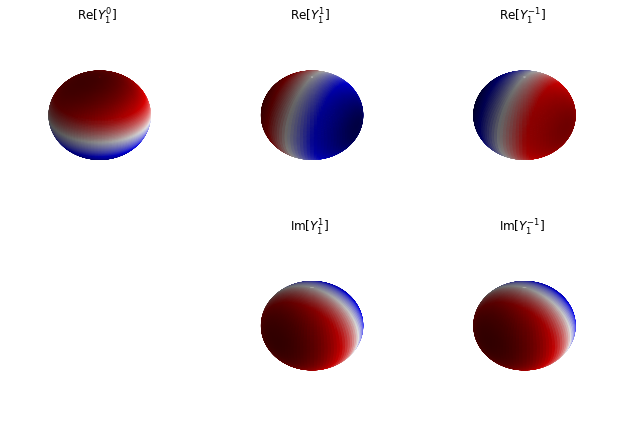

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 1
plot_spherical_harmonics(0, 1, axes[0, 0], 'real')
axes[0, 0].set_title(r'Re[$Y^0_1$]')

# Plot m, l = 1, 1
plot_spherical_harmonics(1, 1, axes[0, 1], 'real')
plot_spherical_harmonics(1, 1, axes[1, 1], 'imag')
axes[0, 1].set_title(r'Re[$Y^1_1$]')
axes[1, 1].set_title(r'Im[$Y^1_1$]')

# Plot m, l = -1, 1
plot_spherical_harmonics(-1, 1, axes[0, 2], 'real')
plot_spherical_harmonics(-1, 1, axes[1, 2], 'imag')
axes[0, 2].set_title(r'Re[$Y^{-1}_1$]')
axes[1, 2].set_title(r'Im[$Y^{-1}_1$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

2. Plot $l=2$ case:

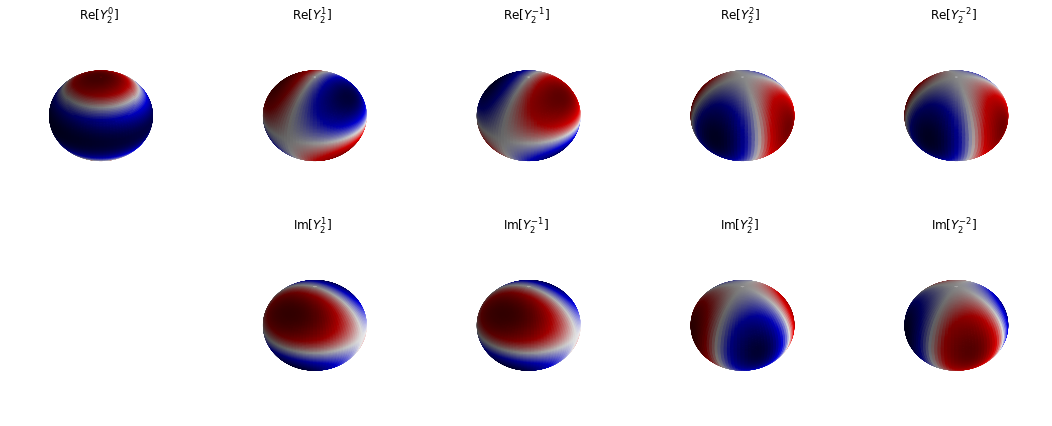

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 2
plot_spherical_harmonics(0, 2, axes[0, 0], 'real')
axes[0, 0].set_title(r'Re[$Y^0_2$]')

# Plot m, l = 1, 2
plot_spherical_harmonics(1, 2, axes[0, 1], 'real')
plot_spherical_harmonics(1, 2, axes[1, 1], 'imag')
axes[0, 1].set_title(r'Re[$Y^1_2$]')
axes[1, 1].set_title(r'Im[$Y^1_2$]')

# Plot m, l = -1, 2
plot_spherical_harmonics(-1, 2, axes[0, 2], 'real')
plot_spherical_harmonics(-1, 2, axes[1, 2], 'imag')
axes[0, 2].set_title(r'Re[$Y^{-1}_2$]')
axes[1, 2].set_title(r'Im[$Y^{-1}_2$]')

# Plot m, l = 2, 2
plot_spherical_harmonics(2, 2, axes[0, 3], 'real')
plot_spherical_harmonics(2, 2, axes[1, 3], 'imag')
axes[0, 3].set_title(r'Re[$Y^2_2$]')
axes[1, 3].set_title(r'Im[$Y^2_2$]')

# Plot m, l = -2, 2
plot_spherical_harmonics(-2, 2, axes[0, 4], 'real')
plot_spherical_harmonics(-2, 2, axes[1, 4], 'imag')
axes[0, 4].set_title(r'Re[$Y^{-2}_2$]')
axes[1, 4].set_title(r'Im[$Y^{-2}_2$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

3. Plot $l=3$ case:

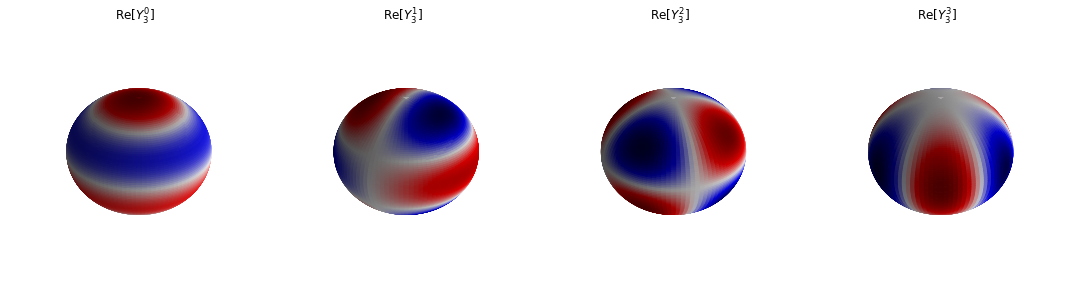

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 3
plot_spherical_harmonics(0, 3, axes[0], 'real')
axes[0].set_title(r'Re[$Y^0_3$]')

# Plot m, l = 1, 3
plot_spherical_harmonics(1, 3, axes[1], 'real')
axes[1].set_title(r'Re[$Y^1_3$]')

# Plot m, l = 2, 3
plot_spherical_harmonics(2, 3, axes[2], 'real')
axes[2].set_title(r'Re[$Y^2_3$]')

# Plot m, l = 3, 3
plot_spherical_harmonics(3, 3, axes[3], 'real')
axes[3].set_title(r'Re[$Y^3_3$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

4. Plot $l=4$ case:

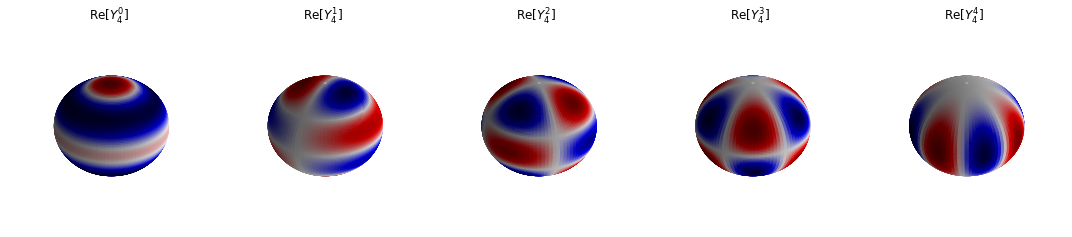

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6), subplot_kw={'projection': '3d'})

# Plot m, l = 0, 4
plot_spherical_harmonics(0, 4, axes[0], 'real')
axes[0].set_title(r'Re[$Y^0_4$]')

# Plot m, l = 1, 4
plot_spherical_harmonics(1, 4, axes[1], 'real')
axes[1].set_title(r'Re[$Y^1_4$]')

# Plot m, l = 2, 4
plot_spherical_harmonics(2, 4, axes[2], 'real')
axes[2].set_title(r'Re[$Y^2_4$]')

# Plot m, l = 3, 4
plot_spherical_harmonics(3, 4, axes[3], 'real')
axes[3].set_title(r'Re[$Y^3_4$]')

# Plot m, l = 3, 4
plot_spherical_harmonics(4, 4, axes[4], 'real')
axes[4].set_title(r'Re[$Y^4_4$]')

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

fig.tight_layout()

# Example




As you will see in Project 3, the temperature anisotropy of the CMB can be described by spherical harmonics:

\begin{equation}
\frac{\Delta T (\theta, \phi)}{T} = \sum_{lm} a^m_l Y^m_l (\theta, \phi)
\end{equation}

where $T = 2.725 \mathrm{K}$ is the mean temperature of the CMB.

<img src="figures/cmb_map.jpg" width=400 height=400 />

We often see the *angular power spectrum* $C_l$:

\begin{equation}
    C_l = \frac{1}{2l + 1} \sum_m |a^m_l|^2
\end{equation}

The angular power spectrum describes the temperature differences between points on the sky separated by an angle $\theta$ (note that here we have changed the definition of $\theta$).
The separation angle $\theta$ relates to the mode $l$ by approximately:

\begin{equation}
    \theta = \frac{180^\circ}{l}
\end{equation}

With some math, we can find that the variance of the temperature fluctuation field is given by:
\begin{equation}
    \left(\frac{\Delta T}{T}\right)_l = \frac{l(l+1)}{2\pi}C_l
\end{equation}

<img src="figures/cmb_angular.jpg" width=800 height=800 />

# Exercise

In this exercise, you will attempt to solve for the coefficients $a^m_l$ given a function $f(\theta, \phi)$.

## Part 1
First, we want to define a function that integrates over a unit sphere. 
In other words, for any well-behave function $F(\theta, \phi)$, define $\mathrm{INT}$ such that:
\begin{equation*}
    \mathrm{INT}[F] = \int_0^{2\pi}\int_ {-1}^{1} F(\theta, \phi) d(\cos\theta) d\phi 
\end{equation*}
Using `scipy.integrat.dblquad` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)), write a Python function `int_sphere` that:
- Take in as its first argument a Python function `F`, which takes theta and phi as its first and second arguments.
- `int_sphere` should return a number.
- You may have as many other arguments as you want. 

In [10]:
from scipy.integrate import dblquad

def int_sphere(F):
    '''
    Integrate over a unit sphere theta=[0, pi] and phi=[0, 2pi]
    Args:
    - F: python function that takes in (theta, phi)
    - args: optional argument for F
    
    Return:
    - res: result of the integration
    '''

    # define the integrand F * sin(theta)
    # unfortunately, scipy.integrate.dblquad can't integrate complex numbers
    # so we have to integrate the real and imaginary parts separately
    def real_func(theta, phi):
        return np.real(F(theta, phi) * np.sin(theta))
    def imag_func(theta, phi):
        return np.imag(F(theta, phi) * np.sin(theta))
    
    # define integration limit
    a, b = 0, 2*np.pi  # phi limit
    gfun, hfun = lambda x: 0, lambda x: np.pi  # theta limit
    
    return dblquad(real_func, a, b, gfun, hfun)[0] + 1j* dblquad(imag_func, a, b, gfun, hfun)[0]

## Part 2

To check if your integration function behaves correctly, evaluate the following:

- $F(\theta, \phi) = 1$
- $F(\theta, \phi) = \sin^2\phi$
- $F(\theta, \phi) = \sin\phi \cos\phi$
- $F(\theta, \phi) = Y^m_l(\theta, \phi) \, Y^m_l(\theta, \phi)^\ast$
- $F(\theta, \phi) = Y^m_l(\theta, \phi) \, Y^n_l(\theta, \phi)^\ast$ for $m \neq n$
- $F(\theta, \phi) = Y^m_l(\theta, \phi) \, Y^m_k(\theta, \phi)^\ast$ for $l  \neq k$


In [11]:
F = lambda theta, phi: 1
int_sphere(F)

(12.566370614359172+0j)

In [12]:
F = lambda theta, phi: np.sin(phi)**2
int_sphere(F)

(6.2831853071795845+0j)

In [13]:
F = lambda theta, phi: np.sin(phi) * np.cos(phi)
int_sphere(F)

(-1.736715080329277e-16+0j)

In [14]:
F = lambda theta, phi: Yml(theta, phi, 3, 5) * np.conj(Yml(theta, phi, 3, 5))
int_sphere(F)

(1.0000000000000002+0j)

In [15]:
F = lambda theta, phi: Yml(theta, phi, 3, 5) * np.conj(Yml(theta, phi, 1, 5))
int_sphere(F)

(-5.449794528138487e-17+2.5284358452789497e-18j)

In [16]:
F = lambda theta, phi: Yml(theta, phi, 3, 5) * np.conj(Yml(theta, phi, 3, 8))
int_sphere(F)

(3.3612000173332593e-16+4.092044627379723e-19j)

## Part 3

Now, use the orthornormality and completeness properties and the solution to Question 3 above to solve for the coefficients $a^m_l$ for the following functions:

- $f(\theta, \phi) = \cos\theta$
- $f(\theta, \phi) = \cos(3\theta)$
- $f(\theta, \phi) = \sin(2\theta)\left[\cos(3\phi) + \sin(2\phi)\right]$

Assuming that $f(\theta, \phi)$ can be written as:
\begin{equation*}
    f(\theta, \phi) = \sum^\infty_{l=0} \sum^l_{m=-l} a^m_l Y^m_l (\theta, \phi)
\end{equation*}

To save time, you should pick a value $l_{max}$ and evaluate all $a^m_l$ up to $l_{max}$

In [17]:
# define a convienient function to integrate f * conj(Yml) for given m and l
def solve_aml(func, m, l):
    # re-define the integrand
    def F(theta, phi):
        return func(theta, phi) * np.conj(Yml(theta, phi, m, l))
    return int_sphere(F)

def solve_all_aml(func, l_min, l_max):
    ''' Return non-zero a_ml from l_min to l_max '''
    m_arr = []
    l_arr = []
    aml_arr = []
    for l in np.arange(l_min, l_max+1):
        for m in np.arange(-l, l+1):
            aml = solve_aml(func, m, l)

            # only add non-zero value of a_ml 
            if np.abs(aml) > 1e-9:
                m_arr.append(m)
                l_arr.append(l)
                aml_arr.append(aml)

    return aml_arr, m_arr, l_arr

In [18]:
func = lambda theta, phi: np.cos(theta)
aml_arr, m_arr, l_arr = solve_all_aml(func, 0, 4)
for i in range(len(aml_arr)):
    print('a({:+}, {}) = {:+.4f}'.format(m_arr[i], l_arr[i], aml_arr[i]))

a(+0, 1) = +2.0467+0.0000j


In [19]:
func = lambda theta, phi: np.cos(3*theta)
aml_arr, m_arr, l_arr = solve_all_aml(func, 0, 4)
for i in range(len(aml_arr)):
    print('a({:+}, {}) = {:+.4f}'.format(m_arr[i], l_arr[i], aml_arr[i]))

a(+0, 1) = -1.2280+0.0000j
a(+0, 3) = +2.1438+0.0000j


In [20]:
func = lambda theta, phi: np.sin(2*theta)*(np.cos(3*phi) + np.sin(2*phi))
aml_arr, m_arr, l_arr = solve_all_aml(func, 0, 4)
for i in range(len(aml_arr)):
    print('a({:+}, {}) = {:+.4f}'.format(m_arr[i], l_arr[i], aml_arr[i]))

a(-2, 3) = -0.0000+1.2608j
a(+2, 3) = -0.0000-1.2608j
a(-3, 4) = +1.1984-0.0000j
a(+3, 4) = -1.1984-0.0000j


## Part 4

Consider the last function in Part 3:

\begin{equation*}
    f(\theta, \phi) = \sin(2\theta)\left[\cos(3\phi) + \sin(2\phi)\right]
\end{equation*}

We want to approximate $f(\theta, \phi)$ using spherical harmonics. 
However, due to computational time, we can only evaluate $a^m_l$ up to a certain $l_{max}$.
We define a function $\hat{f}_{l_{max}}(\theta, \phi)$:

\begin{equation*}
     f(\theta, \phi) \approx \hat{f}_{l_{max}}(\theta, \phi) = \sum^{l_{max}}_{l=0} \sum^l_{m=-l} a^m_l Y^m_l (\theta, \phi) 
\end{equation*}

Define a Python function for $f_{l_{max}}(\theta, \phi)$. 
For $l_{max} = 4, 8, 12$, plot $f(\theta, \phi)$, $\hat{f}_{l_{max}}(\theta, \phi)$, and their residual:

\begin{equation*}
      \hat{r}(\theta, \phi) = f(\theta, \phi) - \hat{f}_{l_{max}}(\theta, \phi)
\end{equation*}

on like a sphere (like the example above).
You should plot both the real and complex components of each function.

How does increasing $l_{max}$ affect the observation? Why?

In [21]:
# For convenience, you can use this function below
# to plot the surface of any function f(theta, phi) on a sphere
def plot_surface(func, ax, mode='real'):
    ''' Plot a color map of any function f(theta, phi) on a sphere '''
    
    # Define an angular grid over a unit sphere
    phi = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    fcolors = func(theta, phi)
    if mode == 'real':
        fcolors = func(theta, phi).real
    elif mode == 'imag':
        fcolors = func(theta, phi).imag
    else:
        raise ValueError('mode must either be "real" or "imag"')

    # Set the aspect ratio to 1 so our sphere looks spherical
    cmap = cm.ScalarMappable(cmap=plt.get_cmap('seismic'))
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cmap.to_rgba(fcolors))

In [22]:
def approx_sph_harm(func, l_max):
    ''' Approximate any function f(theta, phi) into as a linear combination of 
    spherical harmonics up to l_max '''
    # Find all a_ml up to l_max
    aml_arr, m_arr, l_arr = solve_all_aml(func, 0, l_max)
    
    # Define and return a new function
    def new_func(theta, phi):
        val = 0 + 1j * 0
        for i in range(len(aml_arr)):
            val += aml_arr[i] * Yml(theta, phi, m_arr[i], l_arr[i])
        return val
    return new_func

In [23]:
func = lambda theta, phi: np.sin(2*theta)*(np.cos(3*phi) + np.sin(2*phi))

# approximate the function up to l = 4, 8, 12
func_l4 = approx_sph_harm(func, 4)
func_l8 = approx_sph_harm(func, 8)
func_l12 = approx_sph_harm(func, 12)

Plot the real part

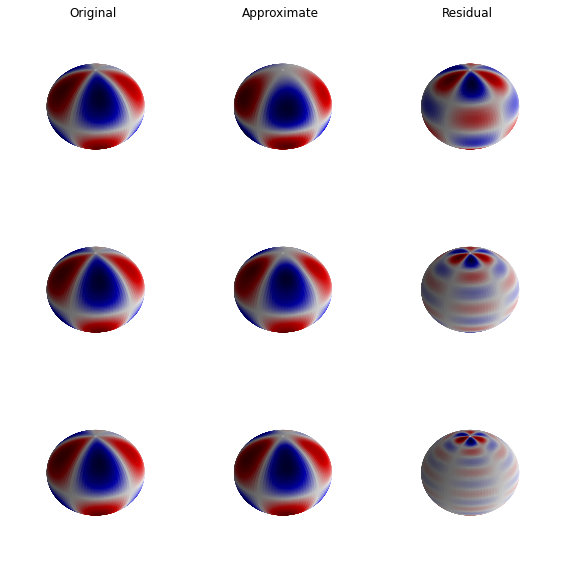

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8), subplot_kw={'projection': '3d'})

mode = 'real'

# Plot l_max = 4 and residual
plot_surface(func, axes[0, 0], mode)
plot_surface(func_l4, axes[0, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l4(theta, phi), axes[0, 2], mode)

# Plot l_max = 8 and residual
plot_surface(func, axes[1, 0], mode)
plot_surface(func_l8, axes[1, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l8(theta, phi), axes[1, 2], mode)

# Plot l_max = 12 and residual
plot_surface(func, axes[2, 0], mode)
plot_surface(func_l12, axes[2, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l12(theta, phi), axes[2, 2], mode)

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Approximate')
axes[0, 2].set_title('Residual')

fig.tight_layout()

The residual $r$ includes all the non-zero $a^m_l$ from $l_{max}$ to $\infty$.
As we increase $l_{max}$, the residual will include only the higher order modes, which represent smaller angular scales.
Therefore, the plots above fit our expectation.

Plot the imaginary part

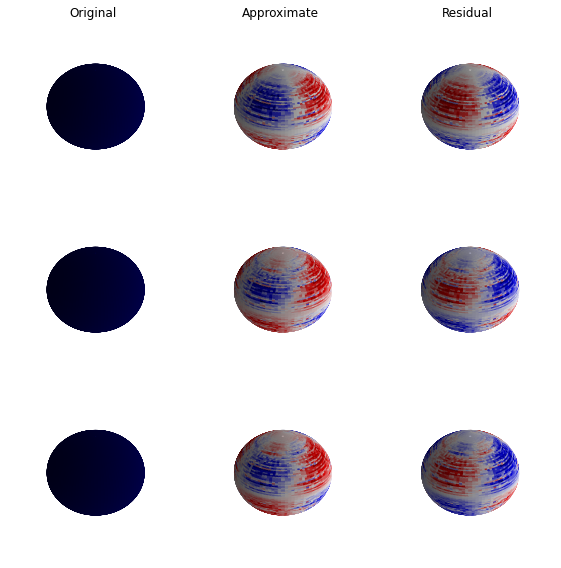

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8), subplot_kw={'projection': '3d'})

mode = 'imag'

# Plot l_max = 4 and residual
plot_surface(func, axes[0, 0], mode)
plot_surface(func_l4, axes[0, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l4(theta, phi), axes[0, 2], mode)

# Plot l_max = 8 and residual
plot_surface(func, axes[1, 0], mode)
plot_surface(func_l8, axes[1, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l8(theta, phi), axes[1, 2], mode)

# Plot l_max = 12 and residual
plot_surface(func, axes[2, 0], mode)
plot_surface(func_l12, axes[2, 1], mode)
plot_surface(lambda theta, phi: func(theta, phi) - func_l12(theta, phi), axes[2, 2], mode)

# Turn off axis
for ax in axes.ravel():
    ax.axis('off')

axes[0, 0].set_title('Original')
axes[0, 1].set_title('Approximate')
axes[0, 2].set_title('Residual')

fig.tight_layout()